In [1]:
#This notebook will analyzing the Connecticut Net Grand List by town from 2011 to 2024. 

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
#Since the original Grand List had all the towns in CT, I decided to separate only Norwalk. Now that I've looked 
#at the data here, I will include two other towns to compare to Norwalk: Bridgeport and Stamford and run again.
#This took me forever to solve because I could not figure out how to change date/time and I kept getting error messages.
#I had to remove [] from date_columns


date_columns = ["GL Year"]

office_data = pd.read_csv(
    "../data/Three_Cities - Net_Grand_List_by_Town,_2011-2024_20251028.csv",
    parse_dates=date_columns
)

print(
    len(office_data),
    office_data.columns
)

42 Index(['GL Year', 'Town Code', 'Town Name', '100 Residential ',
       '200 Commercial', '250 Income and Expense Penalties', '300 Industrial',
       '400 Public Utility ', '500 Vacant Land', '600 Land Use',
       '700 Ten Mill Land', '800 Apartment', 'Total Real Property',
       'Exemptions', 'Net Real Property', 'Motor Vehicle',
       'Motor Vehicle Exemption', 'Total Net Motor Vehicle',
       'Personal Property', 'Personal Property Exemptions',
       'Net Personal Property ', 'Total Net Grand List'],
      dtype='object')


In [4]:
#With the above, I combined the three cities into a mastersheet. Now, I will start cleaning the data
#in order to see what I'm working with. I know how big my dataset is because I made a new Spreadsheet. The original
#was 2368 rows, but I will be checking again.



len(office_data)

42

In [5]:
#This is the number of columns currently in the range.

office_data.columns
len(office_data.columns)



22

In [6]:
office_data.dtypes

GL Year                             datetime64[ns]
Town Code                                    int64
Town Name                                   object
100 Residential                             object
200 Commercial                              object
250 Income and Expense Penalties            object
300 Industrial                              object
400 Public Utility                          object
500 Vacant Land                             object
600 Land Use                                object
700 Ten Mill Land                          float64
800 Apartment                               object
Total Real Property                         object
Exemptions                                  object
Net Real Property                           object
Motor Vehicle                               object
Motor Vehicle Exemption                     object
Total Net Motor Vehicle                     object
Personal Property                           object
Personal Property Exemptions   

In [7]:
#Renaming columns to make it easier to work with.

office_data.rename(columns={
    "100 Residential " : "Residential",
    "200 Commercial" : "Commercial",
    "Total Net Grand List" : "Total Grand List"}, inplace=True)

#There was white space in 100 Residential, which was making it difficult to rename.

In [8]:
office_data.head()

,GL Year,Town Code,Town Name,Residential,Commercial,250 Income and Expense Penalties,300 Industrial,400 Public Utility,500 Vacant Land,600 Land Use,...,Total Real Property,Exemptions,Net Real Property,Motor Vehicle,Motor Vehicle Exemption,Total Net Motor Vehicle,Personal Property,Personal Property Exemptions,Net Personal Property,Total Grand List
0,2024-01-01,103,Norwalk,"11,686,464,996","3,247,797,905",0,"213,894,861","38,509,740","177,699,790","691,920",...,"16,486,988,092","1,987,786,381","14,499,201,711","894,404,959","1,137,510","893,267,449","911,100,244","15,754,252","895,345,992","16,287,815,152"
1,2023-01-01,103,Norwalk,"11,640,782,312","3,141,154,278",0,"205,682,721","38,509,740","181,982,560","691,920",...,"16,236,562,761","2,682,701,900","13,553,860,861","959,951,933","12,875,420","947,076,513","897,293,867","16,040,475","881,253,392","15,382,190,766"
2,2022-01-01,103,Norwalk,"8,627,809,477","3,455,835,766",0,"199,530,197","52,676,295","165,230,658","613,240",...,"13,278,282,544","210,278,915","13,068,003,629","1,024,107,704","12,710,166","1,011,397,538","805,820,921","15,560,779","790,260,142","14,869,661,309"
3,2021-01-01,103,Norwalk,"8,537,812,953","3,304,358,744","56,750,709","192,100,010","45,428,368","200,328,928","329,020",...,"13,203,275,950","265,363,046","12,937,912,904","918,899,115","16,068,474","902,830,641","923,333,277","13,133,877","910,199,400","14,750,942,945"
4,2020-01-01,103,Norwalk,"8,512,849,253","3,364,526,719",93393958,"191,631,980","50,120,013","194,831,684","329,020",...,"13,249,105,236","237,190,075","13,011,915,161","724,711,347","13,449,960","711,261,387","974,150,103","15,715,229","958,434,874","14,681,611,422"


In [9]:
office_data["Residential"].describe()

count                 42
unique                42
top       11,686,464,996
freq                   1
Name: Residential, dtype: object

In [10]:
#I couldn't remember how to do this so I Googled.
#Total Grand List is giving a different number.


office_data["Residential"]= (office_data["Residential"].astype(str).str.replace(",", "", regex=False))
office_data["Residential"] = pd.to_numeric(office_data["Residential"], errors="coerce")

office_data["Commercial"]= (office_data["Commercial"].astype(str).str.replace(",", "", regex=False))
office_data["Commercial"] = pd.to_numeric(office_data["Commercial"], errors="coerce")

office_data["Total Grand List"]= (office_data["Total Grand List"].astype(str).str.replace(",", "", regex=False))
office_data["Total Grand List"] = pd.to_numeric(office_data["Total Grand List"], errors="coerce")

In [11]:
office_data.head()

,GL Year,Town Code,Town Name,Residential,Commercial,250 Income and Expense Penalties,300 Industrial,400 Public Utility,500 Vacant Land,600 Land Use,...,Total Real Property,Exemptions,Net Real Property,Motor Vehicle,Motor Vehicle Exemption,Total Net Motor Vehicle,Personal Property,Personal Property Exemptions,Net Personal Property,Total Grand List
0,2024-01-01,103,Norwalk,11686464996,3247797905,0,"213,894,861","38,509,740","177,699,790","691,920",...,"16,486,988,092","1,987,786,381","14,499,201,711","894,404,959","1,137,510","893,267,449","911,100,244","15,754,252","895,345,992",1.628782e+10
1,2023-01-01,103,Norwalk,11640782312,3141154278,0,"205,682,721","38,509,740","181,982,560","691,920",...,"16,236,562,761","2,682,701,900","13,553,860,861","959,951,933","12,875,420","947,076,513","897,293,867","16,040,475","881,253,392",1.538219e+10
2,2022-01-01,103,Norwalk,8627809477,3455835766,0,"199,530,197","52,676,295","165,230,658","613,240",...,"13,278,282,544","210,278,915","13,068,003,629","1,024,107,704","12,710,166","1,011,397,538","805,820,921","15,560,779","790,260,142",1.486966e+10
3,2021-01-01,103,Norwalk,8537812953,3304358744,"56,750,709","192,100,010","45,428,368","200,328,928","329,020",...,"13,203,275,950","265,363,046","12,937,912,904","918,899,115","16,068,474","902,830,641","923,333,277","13,133,877","910,199,400",1.475094e+10
4,2020-01-01,103,Norwalk,8512849253,3364526719,93393958,"191,631,980","50,120,013","194,831,684","329,020",...,"13,249,105,236","237,190,075","13,011,915,161","724,711,347","13,449,960","711,261,387","974,150,103","15,715,229","958,434,874",1.468161e+10


In [12]:
office_data.dtypes

GL Year                             datetime64[ns]
Town Code                                    int64
Town Name                                   object
Residential                                  int64
Commercial                                   int64
250 Income and Expense Penalties            object
300 Industrial                              object
400 Public Utility                          object
500 Vacant Land                             object
600 Land Use                                object
700 Ten Mill Land                          float64
800 Apartment                               object
Total Real Property                         object
Exemptions                                  object
Net Real Property                           object
Motor Vehicle                               object
Motor Vehicle Exemption                     object
Total Net Motor Vehicle                     object
Personal Property                           object
Personal Property Exemptions   

In [13]:
#Now that I've seen what I am working with I can start thinking of more questions.
#Based on my project, I think I should be focusing on 200 Commercial column because according to the coding system,
#it fits the parameter of being used for office space.

In [14]:
office_data['Residential Year over Year'] = office_data.groupby("Town Name")['Residential'].pct_change() * 100

In [15]:
#Confirming that Residential YOY works.

office_data.head()

,GL Year,Town Code,Town Name,Residential,Commercial,250 Income and Expense Penalties,300 Industrial,400 Public Utility,500 Vacant Land,600 Land Use,...,Exemptions,Net Real Property,Motor Vehicle,Motor Vehicle Exemption,Total Net Motor Vehicle,Personal Property,Personal Property Exemptions,Net Personal Property,Total Grand List,Residential Year over Year
0,2024-01-01,103,Norwalk,11686464996,3247797905,0,"213,894,861","38,509,740","177,699,790","691,920",...,"1,987,786,381","14,499,201,711","894,404,959","1,137,510","893,267,449","911,100,244","15,754,252","895,345,992",1.628782e+10,NaN
1,2023-01-01,103,Norwalk,11640782312,3141154278,0,"205,682,721","38,509,740","181,982,560","691,920",...,"2,682,701,900","13,553,860,861","959,951,933","12,875,420","947,076,513","897,293,867","16,040,475","881,253,392",1.538219e+10,-0.390903
2,2022-01-01,103,Norwalk,8627809477,3455835766,0,"199,530,197","52,676,295","165,230,658","613,240",...,"210,278,915","13,068,003,629","1,024,107,704","12,710,166","1,011,397,538","805,820,921","15,560,779","790,260,142",1.486966e+10,-25.882907
3,2021-01-01,103,Norwalk,8537812953,3304358744,"56,750,709","192,100,010","45,428,368","200,328,928","329,020",...,"265,363,046","12,937,912,904","918,899,115","16,068,474","902,830,641","923,333,277","13,133,877","910,199,400",1.475094e+10,-1.043098
4,2020-01-01,103,Norwalk,8512849253,3364526719,93393958,"191,631,980","50,120,013","194,831,684","329,020",...,"237,190,075","13,011,915,161","724,711,347","13,449,960","711,261,387","974,150,103","15,715,229","958,434,874",1.468161e+10,-0.292390


In [16]:
office_data['Commericial Year over Year'] = office_data.groupby("Town Name")['Commercial'].pct_change() * 100

In [17]:
office_data.head()

,GL Year,Town Code,Town Name,Residential,Commercial,250 Income and Expense Penalties,300 Industrial,400 Public Utility,500 Vacant Land,600 Land Use,...,Net Real Property,Motor Vehicle,Motor Vehicle Exemption,Total Net Motor Vehicle,Personal Property,Personal Property Exemptions,Net Personal Property,Total Grand List,Residential Year over Year,Commericial Year over Year
0,2024-01-01,103,Norwalk,11686464996,3247797905,0,"213,894,861","38,509,740","177,699,790","691,920",...,"14,499,201,711","894,404,959","1,137,510","893,267,449","911,100,244","15,754,252","895,345,992",1.628782e+10,NaN,NaN
1,2023-01-01,103,Norwalk,11640782312,3141154278,0,"205,682,721","38,509,740","181,982,560","691,920",...,"13,553,860,861","959,951,933","12,875,420","947,076,513","897,293,867","16,040,475","881,253,392",1.538219e+10,-0.390903,-3.283567
2,2022-01-01,103,Norwalk,8627809477,3455835766,0,"199,530,197","52,676,295","165,230,658","613,240",...,"13,068,003,629","1,024,107,704","12,710,166","1,011,397,538","805,820,921","15,560,779","790,260,142",1.486966e+10,-25.882907,10.018021
3,2021-01-01,103,Norwalk,8537812953,3304358744,"56,750,709","192,100,010","45,428,368","200,328,928","329,020",...,"12,937,912,904","918,899,115","16,068,474","902,830,641","923,333,277","13,133,877","910,199,400",1.475094e+10,-1.043098,-4.383224
4,2020-01-01,103,Norwalk,8512849253,3364526719,93393958,"191,631,980","50,120,013","194,831,684","329,020",...,"13,011,915,161","724,711,347","13,449,960","711,261,387","974,150,103","15,715,229","958,434,874",1.468161e+10,-0.292390,1.820867


In [18]:
office_data['Commericial % of Grand List'] = (office_data["Commercial"]/office_data["Total Grand List"])* 100

In [34]:
office_data.head(20)

,GL Year,Town Code,Town Name,Residential,Commercial,250 Income and Expense Penalties,300 Industrial,400 Public Utility,500 Vacant Land,600 Land Use,...,Motor Vehicle,Motor Vehicle Exemption,Total Net Motor Vehicle,Personal Property,Personal Property Exemptions,Net Personal Property,Total Grand List,Residential Year over Year,Commericial Year over Year,Commericial % of Grand List
0,2024-01-01,103,Norwalk,11686464996,3247797905,0,"213,894,861","38,509,740","177,699,790","691,920",...,"894,404,959","1,137,510","893,267,449","911,100,244","15,754,252","895,345,992",1.628782e+10,NaN,NaN,19.940046
1,2023-01-01,103,Norwalk,11640782312,3141154278,0,"205,682,721","38,509,740","181,982,560","691,920",...,"959,951,933","12,875,420","947,076,513","897,293,867","16,040,475","881,253,392",1.538219e+10,-0.390903,-3.283567,20.420721
2,2022-01-01,103,Norwalk,8627809477,3455835766,0,"199,530,197","52,676,295","165,230,658","613,240",...,"1,024,107,704","12,710,166","1,011,397,538","805,820,921","15,560,779","790,260,142",1.486966e+10,-25.882907,10.018021,23.240851
3,2021-01-01,103,Norwalk,8537812953,3304358744,"56,750,709","192,100,010","45,428,368","200,328,928","329,020",...,"918,899,115","16,068,474","902,830,641","923,333,277","13,133,877","910,199,400",1.475094e+10,-1.043098,-4.383224,22.401000
4,2020-01-01,103,Norwalk,8512849253,3364526719,93393958,"191,631,980","50,120,013","194,831,684","329,020",...,"724,711,347","13,449,960","711,261,387","974,150,103","15,715,229","958,434,874",1.468161e+10,-0.292390,1.820867,22.916604
5,2019-01-01,103,Norwalk,8504356806,3360946619,27711796,"195,265,870","63,901,356","201,475,585","329,020",...,"694,756,658","12,520,835","682,235,823","844,400,657","12,409,241","831,991,416",1.467161e+10,-0.099760,-0.106407,22.907827
6,2018-01-01,103,Norwalk,8481375551,3045080784,NaN,"193,465,314","63,901,356","200,549,869","289,150",...,"678,100,411","13,472,106","664,628,305","815,962,868","11,029,526","804,933,342",1.427858e+10,-0.270229,-9.398121,21.326216
7,2017-01-01,103,Norwalk,7715387246,2309942240,NaN,"149,549,385","42,111,701","155,443,762","25,760",...,"662,669,421","14,142,261","648,527,160","814,815,558","16,107,077","798,708,481",1.226336e+10,-9.031416,-24.141840,18.836133
8,2016-01-01,103,Norwalk,7686517100,2308139865,NaN,"149,922,625","42,304,780","155,265,627","25,760",...,"654,421,936","15,117,515","639,304,421","823,379,371","15,073,970","808,305,401",1.220189e+10,-0.374189,-0.078027,18.916245
9,2015-01-01,103,Norwalk,7636935131,2311033945,NaN,"146,297,142","51,993,520","149,723,574","25,760",...,"629,304,059","14,686,384","614,617,675","812,178,694","27,489,593","784,689,101",1.209183e+10,-0.645051,0.125386,19.112359


In [25]:
#Now that I have the data I need, I would like to try plotting.

norwalk_data=office_data[office_data["Town Name"] == "Norwalk"]
norwalk_data=norwalk_data.set_index("GL Year").sort_index()




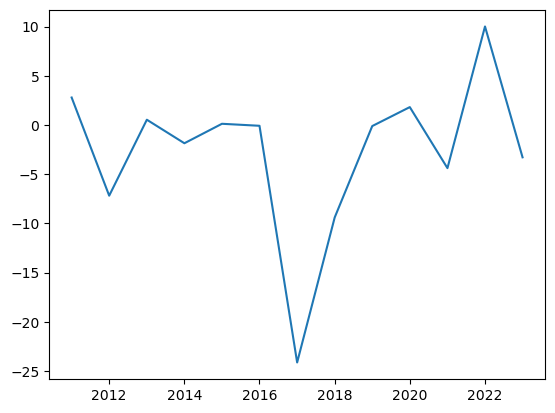

In [30]:
plt.plot(norwalk_data["Commericial Year over Year"])

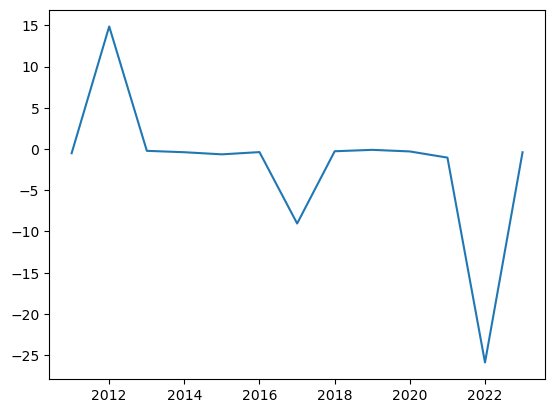

In [31]:
norwalk_data=office_data[office_data["Town Name"] == "Norwalk"]
norwalk_data=norwalk_data.set_index("GL Year").sort_index()
plt.plot(norwalk_data["Residential Year over Year"])

In [32]:
os.makedirs("../output", exist_ok=True)

In [33]:
norwalk_data.to_csv("../output/norwalk_analysis.csv", index=False)